In [356]:
import matplotlib.lines as mlines
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import math

warnings.filterwarnings('ignore')

In [ ]:
def plot_runtime_analysis(df):

    matchers = df['matcher'].unique()

    magneto_methods = ['Magneto', 'MagnetoGPT']

    df['matcher'] = pd.Categorical(df['matcher'], categories=magneto_methods + [
                                   m for m in matchers if m not in magneto_methods], ordered=True)
    df = df.sort_values('matcher')

    other_methods = [m for m in matchers if m not in magneto_methods]

    magneto_palette = sns.color_palette("Reds", n_colors=len(magneto_methods))

    other_palette = sns.color_palette("Blues", n_colors=len(other_methods))[::-1]

    palette = {method: color for method, color in zip(magneto_methods + other_methods,
                                                      list(magneto_palette) + list(other_palette))}

    datasets = df['usecase'].unique()
    n_datasets = len(datasets)

    n_rows = math.ceil(n_datasets / 2)

    fig, axes = plt.subplots(n_rows, 2, figsize=(7.5, 2.5),
                             sharex=False, sharey=True)

    plt.subplots_adjust(hspace=0.2)

    # Flatten axes for easier iteration
    axes = axes.flatten()

    # palette = sns.color_palette("pastel", n_colors=len(df['matcher'].unique()))

    # Plot each dataset
    for i, dataset in enumerate(datasets):
        ax = axes[i]

        # Filter data for the current dataset
        df_subset = df[df['usecase'] == dataset]

        # Lineplot for each matcher
        # sns.lineplot(
        #     data=df_subset,
        #     x='target_sample',
        #     y='avg_runtime',
        #     palette=palette,
        #     hue='matcher',
        #     marker='o',
        #     ax=ax
        # )

        markers = ['o', 'd', 's', 'o', 'X']
        linestyles = ['-', '--', ':', '-.', '--']

        for j, matcher in enumerate(df_subset['matcher'].unique()):
            sns.lineplot(
            data=df_subset[df_subset['matcher'] == matcher],
            x='target_sample',
            y='avg_runtime',
            marker=markers[j % len(markers)],
            linestyle=linestyles[j % len(linestyles)],
            label=matcher,
            color = palette[matcher],
            ax=ax,
            markersize=8
            )
        
        # sns.lineplot(
        #     data=df_subset,
        #     x='target_sample',
        #     y='avg_runtime',
        #     hue='matcher',
        #     style='matcher',  # Different patterns for lines
        #     markers=True,
        #     dashes=True,
        #     palette=palette,
        #     ax=ax
        # )

            # Customize the subplot
            ax.set_title(f"{dataset}", fontsize=12)
            ax.set_xlabel("#Columns in the Target Table", fontsize=11)
            ax.set_ylabel("Runtime (s)", fontsize=12)

            ax.set_yscale('log')

            # Use decimal scale for y-axis
            ax.yaxis.set_major_formatter(
                plt.FuncFormatter(lambda y, _: '{:.16g}'.format(y)))

            ax.yaxis.set_minor_locator(plt.NullLocator())

            ax.tick_params(axis='both', which='major', labelsize=11)

            nmatchers = len(df_subset['matcher'].unique())

            if i == 1:
                handles, labels = ax.get_legend_handles_labels()
                ax.legend(handles=handles, labels=labels, loc='lower center',
                        bbox_to_anchor=(-0.15, -0.44), ncol=6, frameon=False, fontsize=12, handletextpad=0.05)
            else:
                ax.get_legend().remove()

    sns.despine()
    # plt.tight_layout()
    plt.savefig('figures/runtime_analysis.pdf', dpi=300, bbox_inches='tight')
    plt.show()

In [358]:
def rename(df):
    df['matcher'] = df['matcher'].replace('ComaInst', 'Coma++')
    df['matcher'] = df['matcher'].replace('JaccardDistanceMatcher', 'Jaccard')
    df['matcher'] = df['matcher'].replace('DistributionBased', 'Distribution')
    df['matcher'] = df['matcher'].replace('SimilarityFlooding', 'SimFlooding')

    # usecases = ['OpenData', 'GDC']

    # df = df[df['usecase'].isin(usecases)]

    df['matcher'] = df['matcher'].replace('ComaInst', 'Coma++')

    df['usecase'] = df['usecase'].replace('GDC-Dou', 'GDC')

    
    
    df['matcher'] = df['matcher'].replace('Magneto GPT', 'MagnetoGPT')



    # matchers = ['Coma++', 'Unicorn', 'SimFlooding',
    #             'Magneto', 'MagnetoGPT', 'ISResMat']
    
    matchers = ['Coma++', 'Unicorn',
                'Magneto', 'MagnetoGPT', 'ISResMat']

    df = df[df['matcher'].isin(matchers)]

    return df

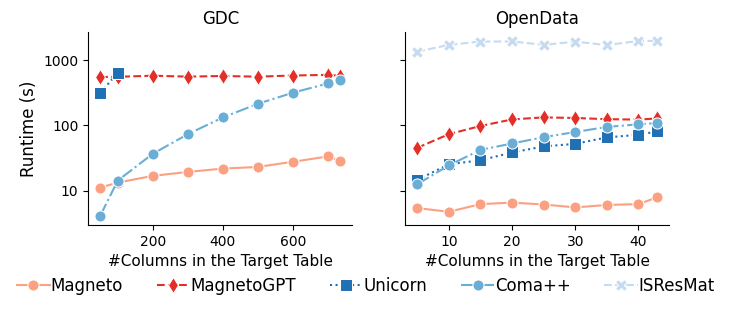

In [359]:
main_path = 'server_results/scalability/*.csv'


all_dfs = []
for file in glob.glob(main_path):
    
    df = pd.read_csv(file)
    


    all_dfs.append(df)
    
df = pd.concat(all_dfs, ignore_index=True)

df = rename(df)

df['avg_runtime'] = df['avg_runtime'] / 1000



plot_runtime_analysis(df)